In [37]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,GRU,Embedding,Dropout,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

In [38]:
# Load the dataset
df = pd.read_csv('merged_dataset.csv')

In [39]:
# first few rows
print(df.head())


                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [40]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None


In [41]:
# Summary statistics
print(df.describe())

                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [42]:
# Check for missing values
print(df.isnull().sum())

Text        0
Language    0
dtype: int64


In [43]:
# check shape
print(df.shape)

(32337, 2)


In [44]:
# distribution of each language on datasets
print(df['Language'].value_counts())


Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Urdu          1000
Japanese      1000
Thai          1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Latin         1000
Pushto        1000
Persian       1000
Romanian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


In [45]:
# View a few random samples for specific languages:
language_sample = df[df['Language'] == 'English'].sample(5)
print(language_sample['Text'])


1467     in august  gordon gano was the subject of a la...
23268                                            go ahead.
20806    in bold contrast to the limitations of the ani...
3580     in court hearst made a poor impression and app...
22257    It is one of the 15 most popular websites as r...
Name: Text, dtype: object


# Text Cleaning

In [46]:
import re

def clean_text(text):
    # Remove text in brackets
    text = re.sub(r'\[.*?\]', '', text)
    return text.strip()

# Apply to the entire dataset
df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [47]:
# Lowercasing: Normalize text by converting it to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [48]:
# Verify Cleaning: Check a few rows to ensure the cleaning worked as expected:
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0  klement gottwaldi surnukeha palsameeriti ning ...   
1  sebes joseph pereira thomas  på eng the jesuit...   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   
4  de spons behoort tot het geslacht haliclona en...   

                                        Cleaned_Text  
0  klement gottwaldi surnukeha palsameeriti ning ...  
1  sebes joseph pereira thomas  på eng the jesuit...  
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...  
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...  
4  de spons behoort tot het geslacht haliclona en...  


In [49]:
# Inspect cleaned rows again
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
11865  سازمان ملل همه ساله اقدام به انتشار شاخص توسعه...   
21140  dizinin geçtiği zamandan beş yıl önce devasa b...   
16459  ovanför sakristian finns ett rum med öppen spi...   
11839  ธีรภัทร์ สุวรรณดี เริ่มเข้าสู่วงการบันเทิง จาก...   
20261  environ  appartements ont été supprimés afin d...   
15938  ولكن احداثيات خط الطول للمدينة المنورة هذا يتف...   
24082  [34] விக்கிப்பீடியா ஆரம்பித்து சில மாதங்களில்,...   
22625  Some language editions, such as the English Wi...   
28138  Она основана и на принципе, согласно которому ...   
1335    में अमेरिका में पीईटी pet की कीमतें  डॉलरटन स...   

                                            Cleaned_Text  
11865  سازمان ملل همه ساله اقدام به انتشار شاخص توسعه...  
21140  dizinin geçtiği zamandan beş yıl önce devasa b...  
16459  ovanför sakristian finns ett rum med öppen spi...  
11839  ธีรภัทร์ สุวรรณดี เริ่มเข้าสู่วงการบันเทิง จาก...  
20261  environ  appartements ont été supprim

In [50]:
# Check for null values
print(df['Cleaned_Text'].isnull().sum())  # Check for null values


0


In [51]:
# Inspect a random sample:
print(df[['Text', 'Cleaned_Text']].sample(10))


                                                    Text  \
30595  Författarna visar att dessa användare går att ...   
12434  in  scottish actor gerard butler was close to ...   
16904  카그라스 증후군이라는 이름은 이 증상을 년 르블-라쇼reboul-lachaux와의 ...   
29256  Le varie edizioni di Wikipedia, facenti capo a...   
26449  heel zacht zo slim woord nummer vier is afschu...   
9012   linnaosavalitsus täidab oma haldusterritoorium...   
31030  نظرًا لتزايد شعبية ويكيبيديا، أدخلت بعض الإصدا...   
9294   発祥は高級懐中時計で、文字盤や裏蓋の一部ないし大部分を切り取ってガラスを嵌めるなどし、精密な...   
9259   in spring  stick figure embarked on their firs...   
15298  dublin on üle maailma tuntud kirjanduslinnana ...   

                                            Cleaned_Text  
30595  författarna visar att dessa användare går att ...  
12434  in  scottish actor gerard butler was close to ...  
16904  카그라스 증후군이라는 이름은 이 증상을 년 르블-라쇼reboul-lachaux와의 ...  
29256  le varie edizioni di wikipedia, facenti capo a...  
26449  heel zacht zo slim woord nummer vier 

In [52]:
# Check the cleaned data
print(df[['Text', 'Language', 'Cleaned_Text']].sample(10))

                                                    Text  Language  \
18747  前面提到，隨著分子生物學的進展，dna黏合酶對於研究人員的貢獻也越來越顯得重要，尤其是在進行...   Chinese   
28099  Хотя некоторые участники сильны в своей област...   Russian   
1090   ذوالقعدہکو آپ خالق حقیقی سے جا ملے اس طرح کم و...      Urdu   
20966  그러나 불타는 군단의 아키몬드가 칼림도어로 침공하자 급히 맬퓨리언을 동면에서 깨워 ...    Korean   
8209   基本的には支払手段としての貨幣機能から生じたもので、「貨幣支払約束書」としての性格を有する。...  Japanese   
23305                                i'm afraid i can't.   English   
156    obreption and subreption both from the latin w...   English   
30272  ama yenmez olan her şey için kalbi kırıldı, ya...   Turkish   
16959  در دوران اشکانیان سرزمین کرمانشاه به دو ایالت ...   Persian   
14104  panmunjom är en övergiven by i norra hwanghae-...   Swedish   

                                            Cleaned_Text  
18747  前面提到，隨著分子生物學的進展，dna黏合酶對於研究人員的貢獻也越來越顯得重要，尤其是在進行...  
28099  хотя некоторые участники сильны в своей област...  
1090   ذوالقعدہکو آپ خالق حقیقی سے جا ملے اس طرح کم 

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Urdu          1000
Japanese      1000
Thai          1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Latin         1000
Pushto        1000
Persian       1000
Romanian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64


<Axes: title={'center': 'Language Distribution'}, xlabel='Language'>

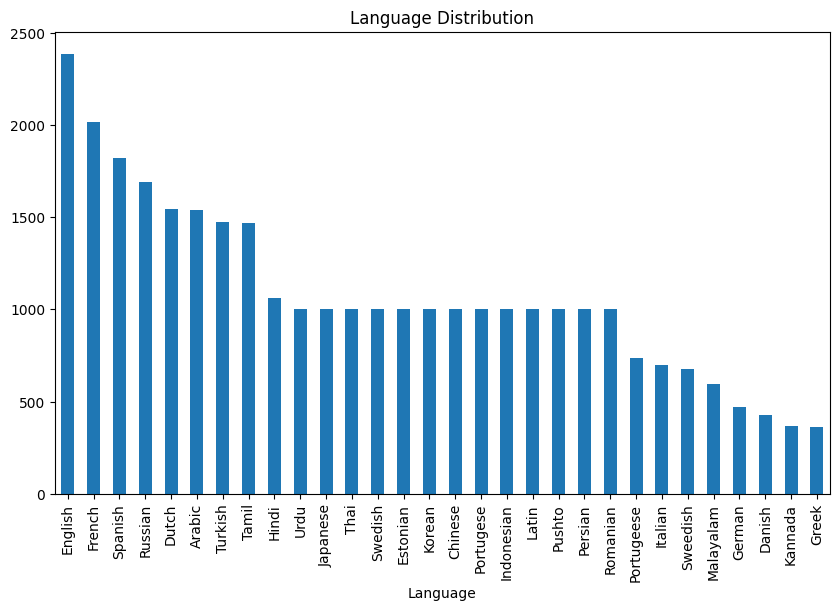

In [53]:
# Examine the Data:
language_count = df['Language'].value_counts()
print(language_count)
language_count.plot(kind='bar', figsize=(10, 6), title='Language Distribution')


In [65]:
# Plot bar graph for language distribution percentages
plt.figure(figsize=(12, 8))
plt.barh(languages, percentages, color='skyblue')
plt.xlabel("Percentage (%)")
plt.ylabel("Languages")
plt.title("Language Distribution in Dataset (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'languages' is not defined

<Figure size 1200x800 with 0 Axes>

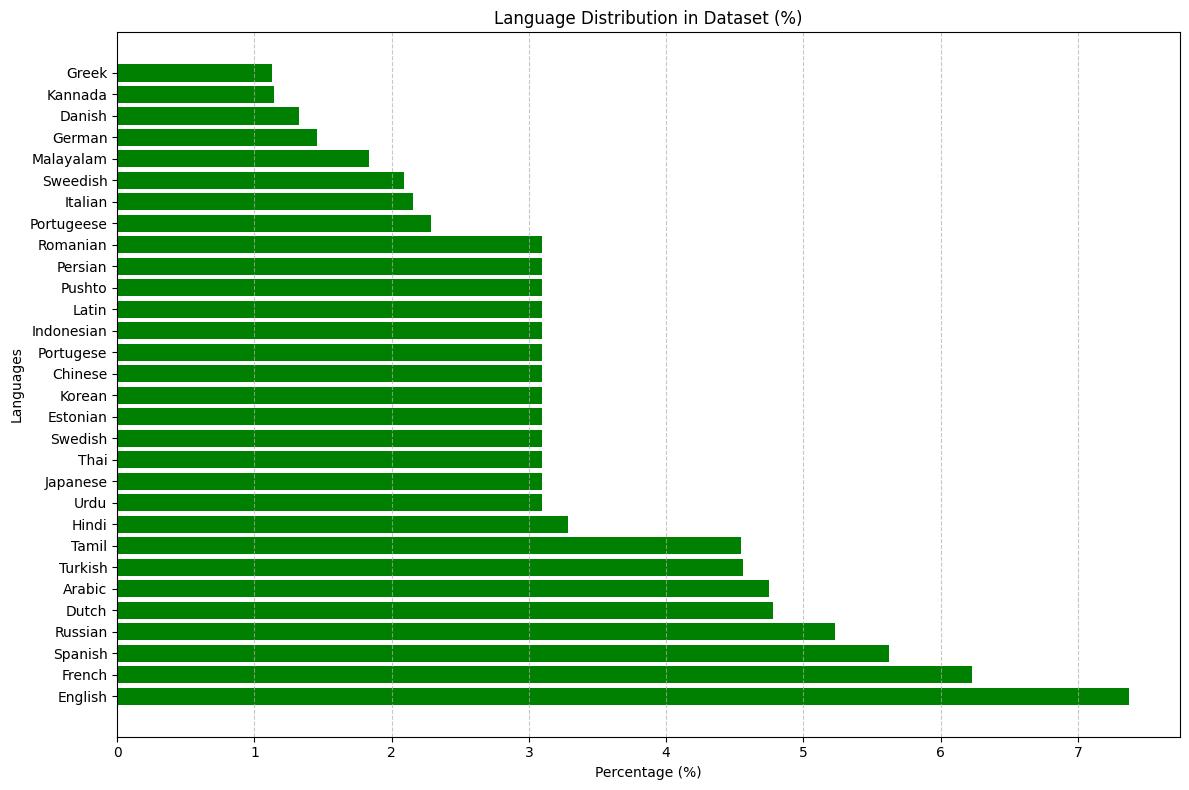

In [70]:
# it shows each language persentages
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the language counts
language_counts = df['Language'].value_counts()

# Extract languages and their corresponding percentages
languages = language_counts.index.tolist()
percentages = (language_counts.values / len(df) * 100).tolist()

# Plot bar graph for language distribution percentages
plt.figure(figsize=(12, 8))
plt.barh(languages, percentages, color='green')
plt.xlabel("Percentage (%)")
plt.ylabel("Languages")
plt.title("Language Distribution in Dataset (%)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
# Check for any missing values
print(df.isnull().sum())


Text            0
Language        0
Cleaned_Text    0
dtype: int64


In [56]:
print(df.shape)

(32337, 3)


 # Split the Data

In [57]:
print(df.columns)


Index(['Text', 'Language', 'Cleaned_Text'], dtype='object')


In [58]:
# split dataset
from sklearn.model_selection import train_test_split

X = df['Cleaned_Text']
y = df['Language']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# label encoding

In [59]:
le =LabelEncoder()
y_train= le.fit_transform(y_train)
le.classes_

array(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Sweedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'], dtype=object)

In [60]:
y_test = le.transform(y_test)

# tokenization

In [61]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# padding

In [62]:
X_train_padded = pad_sequences(X_train_seq,maxlen=100,padding='post')
X_test_padded = pad_sequences(X_test_seq,maxlen=100,padding='post')

In [63]:
input_dim = tokenizer.num_words
embedding_dim = 128
max_lenght = X_train_padded.shape[1]
num_classes = len(le.classes_)
max_lenght

100

In [64]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.


# gru model